In [197]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
import scipy as sp

In [41]:
def f(x):
    return 0.7 * x
def get_uniform(a, b, num):
    RVs = (b - a) * np.random.rand(num) + a
    return RVs

In [42]:
domain = np.arange(0, 5, 0.01) 
RVs = get_uniform(0, 5, 20)

In [96]:
value = f(RVs) + get_uniform(-0.7, 0.7, 20)

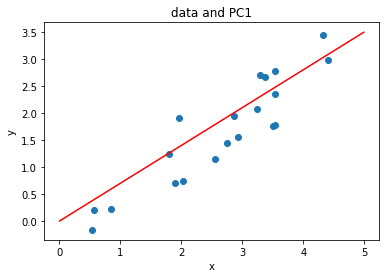

In [99]:
plt.plot(domain, f(domain), color='red')
plt.scatter(RVs, value)
plt.xlabel("x")
plt.ylabel("y")
plt.title("data and PC1")
plt.savefig("../Images/data_pc1.png")

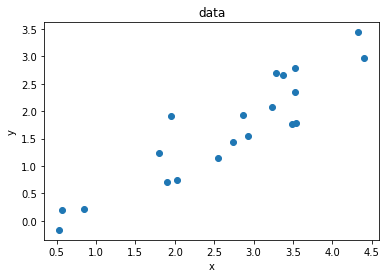

In [106]:
plt.scatter(RVs, value)
plt.xlabel("x")
plt.ylabel("y")
plt.title("data")
plt.savefig("../Images/data.png")

In [121]:
data = np.array([RVs, value]).T

In [123]:
data = preprocessing.StandardScaler().fit_transform(data)

In [237]:
C = np.cov(data.T, bias=True)
C

array([[1.        , 0.91749823],
       [0.91749823, 1.        ]])

In [234]:
def objective(X):
    res = np.dot(np.dot(X.T, C), X)
    return np.trace(res)

In [235]:
def Gradient(X):
    return -np.dot(C.T + C, X)
def Projection(X, Egrad):
    def sym(A):
        return (A + A.T)/2
    return Egrad - X.dot(sym(X.T.dot(Egrad)))
def Retraction(X, grad):
    I = np.identity(2)
    return np.dot(X + grad, np.linalg.inv(sp.linalg.sqrtm(I + np.dot(grad.T, grad))))

In [236]:
epoch = 5
X = np.linalg.qr(np.random.normal(0, 100, (2, 2)))[0]
print(X)
for _ in range(epoch):
    #print(Gradient(X))
    Rgrad = Projection(X, Gradient(X))
    X = Retraction(X, -0.01 * Rgrad)
    print(X)

[[-0.90887053 -0.41707836]
 [-0.41707836  0.90887053]]
[[-0.90887053 -0.41707836]
 [-0.41707836  0.90887053]]
[[-0.90887053 -0.41707836]
 [-0.41707836  0.90887053]]
[[-0.90887053 -0.41707836]
 [-0.41707836  0.90887053]]
[[-0.90887053 -0.41707836]
 [-0.41707836  0.90887053]]
[[-0.90887053 -0.41707836]
 [-0.41707836  0.90887053]]


In [222]:
def skew(A):
    return 0.5 * (A - A.T)
d = np.array([[2, 1.83], [1.83, 2]])
skew(d)

array([[0., 0.],
       [0., 0.]])

In [192]:
X = np.array([[9, 4], [4, 7]])
np.linalg.qr(X)

(array([[-0.91381155, -0.40613847],
        [-0.40613847,  0.91381155]]),
 array([[-9.8488578 , -6.49821546],
        [ 0.        ,  4.77212698]]))